<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* customer analysis
* iterator

In [12]:
import pandas as pd 
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
from datetime import datetime, date, time, timezone
import os
import re
import matplotlib.pyplot as plt 
import seaborn as sns 

from functools import reduce
from collections import defaultdict

# customer analysis

In [2]:
os.listdir()

['.config',
 'scanner_data.csv',
 'ecommerce-data.csv',
 '1_orders_dataset.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'online_retail_II.xlsx',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'test.csv',
 'mall_customers.csv',
 '1_order_payments_dataset.csv',
 '1_customers_dataset.csv',
 'sample_data']

In [27]:
df = pd.read_csv('mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
df.columns = [re.sub(' ', '_', (re.sub(' \(.+\)', '', a).lower())) for a in df.columns]
df.head()

,customerid,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


(array([ 3.,  2.,  6.,  6.,  3.,  0.,  4.,  5.,  5., 13.,  1.,  9.,  4.,
         1.,  4.,  3.,  3.,  1.,  5.,  2.,  4.,  6.,  4.,  3.,  0.,  4.,
         1.,  1.,  1.,  2.,  0.,  1.,  1.,  1.,  3.]),
 array([18.        , 19.42857143, 20.85714286, 22.28571429, 23.71428571,
        25.14285714, 26.57142857, 28.        , 29.42857143, 30.85714286,
        32.28571429, 33.71428571, 35.14285714, 36.57142857, 38.        ,
        39.42857143, 40.85714286, 42.28571429, 43.71428571, 45.14285714,
        46.57142857, 48.        , 49.42857143, 50.85714286, 52.28571429,
        53.71428571, 55.14285714, 56.57142857, 58.        , 59.42857143,
        60.85714286, 62.28571429, 63.71428571, 65.14285714, 66.57142857,
        68.        ]),
 <a list of 35 Patch objects>)

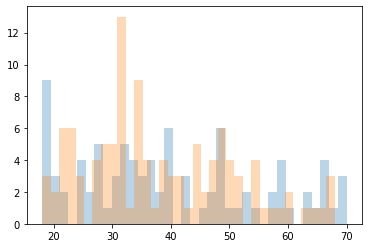

In [37]:
plt.hist(df[df.gender == 'Male']['age'], alpha = .3, bins = 35)
plt.hist(df[df.gender == 'Female']['age'], alpha = .3, bins = 35)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd8f403cb10>]],
      dtype=object)

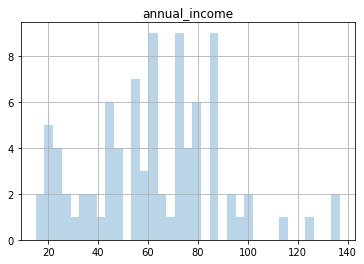

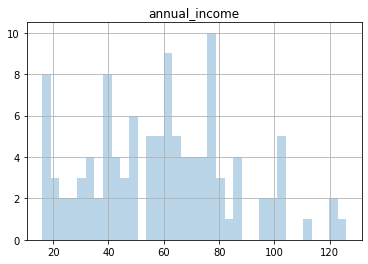

In [41]:
df[df.gender == 'Male'].hist(['annual_income'], bins = 35, alpha = .3)
df[df.gender == 'Female'].hist(['annual_income'], bins = 35, alpha = .3)

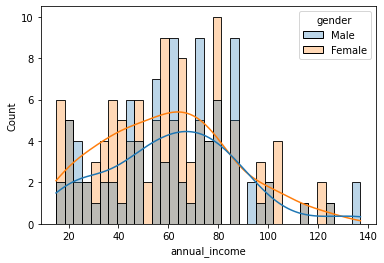

In [50]:
sns.histplot(data = df, x = 'annual_income', hue = 'gender', alpha = .3, kde = True, bins = 35)

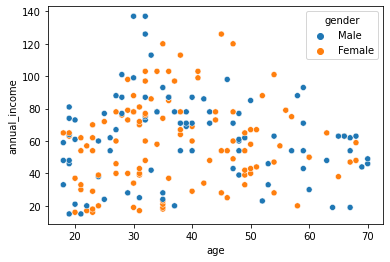

In [52]:
sns.scatterplot(data = df, x = 'age', y = 'annual_income', hue = 'gender')

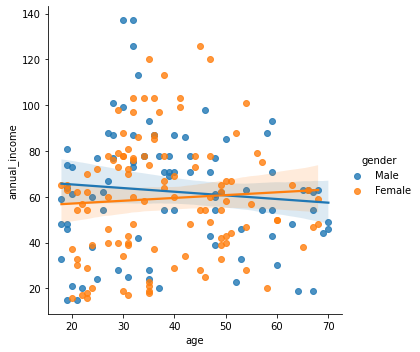

In [53]:
sns.lmplot(data = df, x = 'age', y = 'annual_income', hue = 'gender')

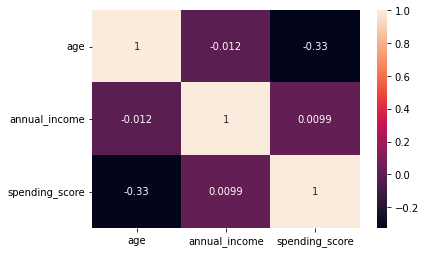

In [58]:
sns.heatmap(df.drop(['customerid'], axis = 1).corr(), annot = True)

Text(0.5, 1.0, 'Male Corr')

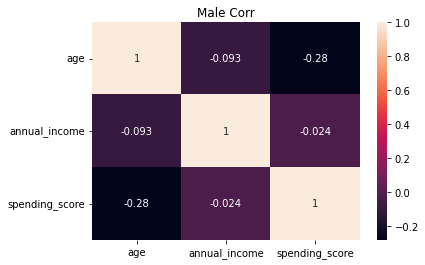

In [62]:
sns.heatmap(df[df.gender == 'Male'].drop(['customerid'], axis = 1).corr(), annot = True)
plt.title('Male Corr')

Text(0.5, 1.0, 'Female Title')

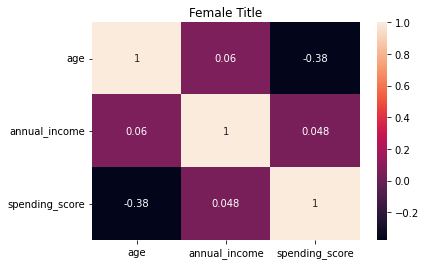

In [63]:
sns.heatmap(df[df.gender == 'Female'].drop(['customerid'], axis = 1).corr(), annot = True)
plt.title('Female Title')

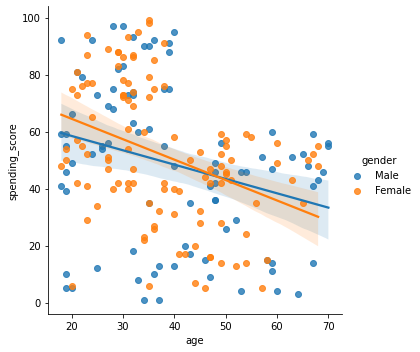

In [64]:
sns.lmplot(data = df, x = 'age', y = 'spending_score', hue = 'gender')

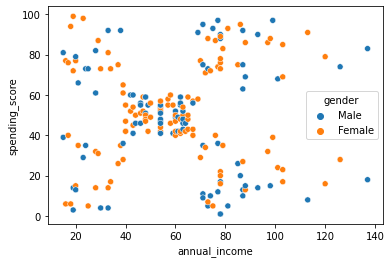

In [66]:
sns.scatterplot(data = df, x = 'annual_income', y = 'spending_score', hue = 'gender')

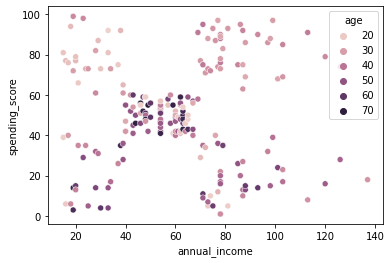

In [67]:
sns.scatterplot(data = df, x = 'annual_income', y = 'spending_score', hue = 'age')

# iterator

In [3]:
mat = [list('ABC'), list('DEF'), list('GHI')]
a = {letter : [r, c] for r, rows in enumerate(mat) for c, letter in enumerate(rows)}
arr = np.empty([3,3], dtype = 'object')
for k, v in a.items() :
  arr[v[0], v[1]] = k
arr

array([['A', 'B', 'C'],
       ['D', 'E', 'F'],
       ['G', 'H', 'I']], dtype=object)

In [11]:
names = np.random.choice(['kim', 'lee', 'park'], 5, replace = True)
rev = np.random.randint(300, 900, 5)
score = np.random.normal(75, 20, 5).round()
b = pd.DataFrame({'name' : names, 'rev' : rev, 'score' : score})
b

,name,rev,score
0,lee,563,73.0
1,kim,466,97.0
2,park,494,65.0
3,park,453,27.0
4,park,754,55.0


In [25]:
score = defaultdict(list)
rev = defaultdict(list)
for i in range(len(b)) : 
  score[b['name'][i]].append(b['score'][i])
  rev[b['name'][i]].append(b['rev'][i])

score

defaultdict(list, {'lee': [73.0], 'kim': [97.0], 'park': [65.0, 27.0, 55.0]})

In [19]:
{k : np.mean(v) for k, v in score.items()}

{'lee': 73.0, 'kim': 97.0, 'park': 49.0}

In [26]:
{k : np.sum(v) for k, v in rev.items()}

{'lee': 563, 'kim': 466, 'park': 1701}